In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("/content/Real estate valuation data set.xlsx")

In [5]:
df.head()

,No,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.drop(columns='No').corr()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

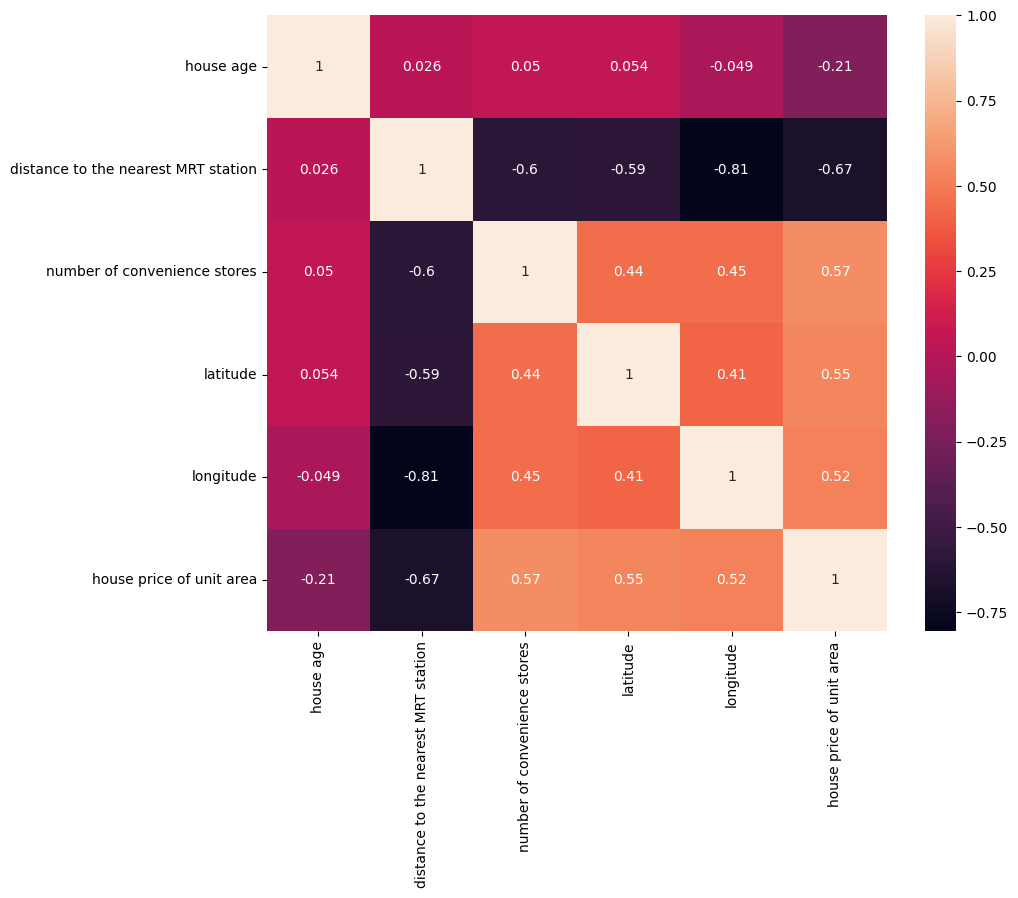

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns='No').corr(),annot=True)

<Axes: >

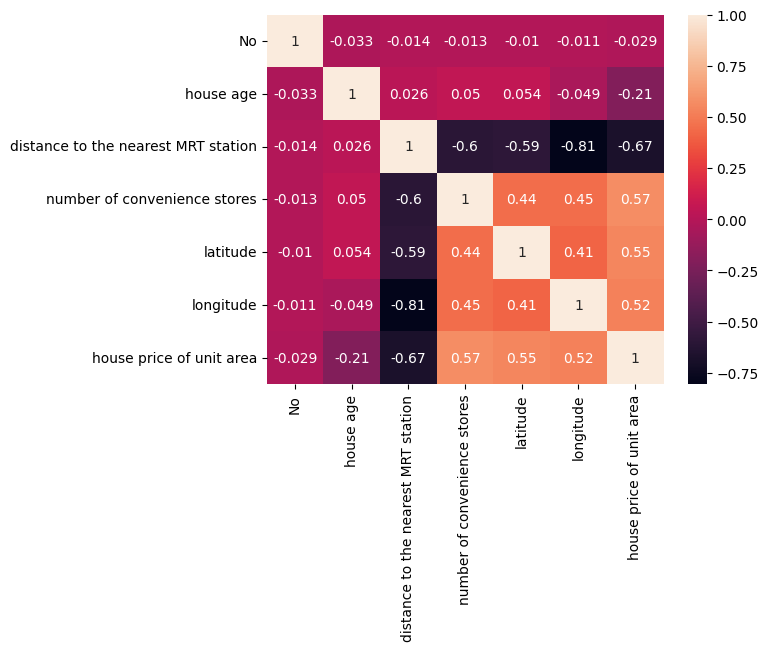

In [8]:
sns.heatmap(df.corr(),annot=True)

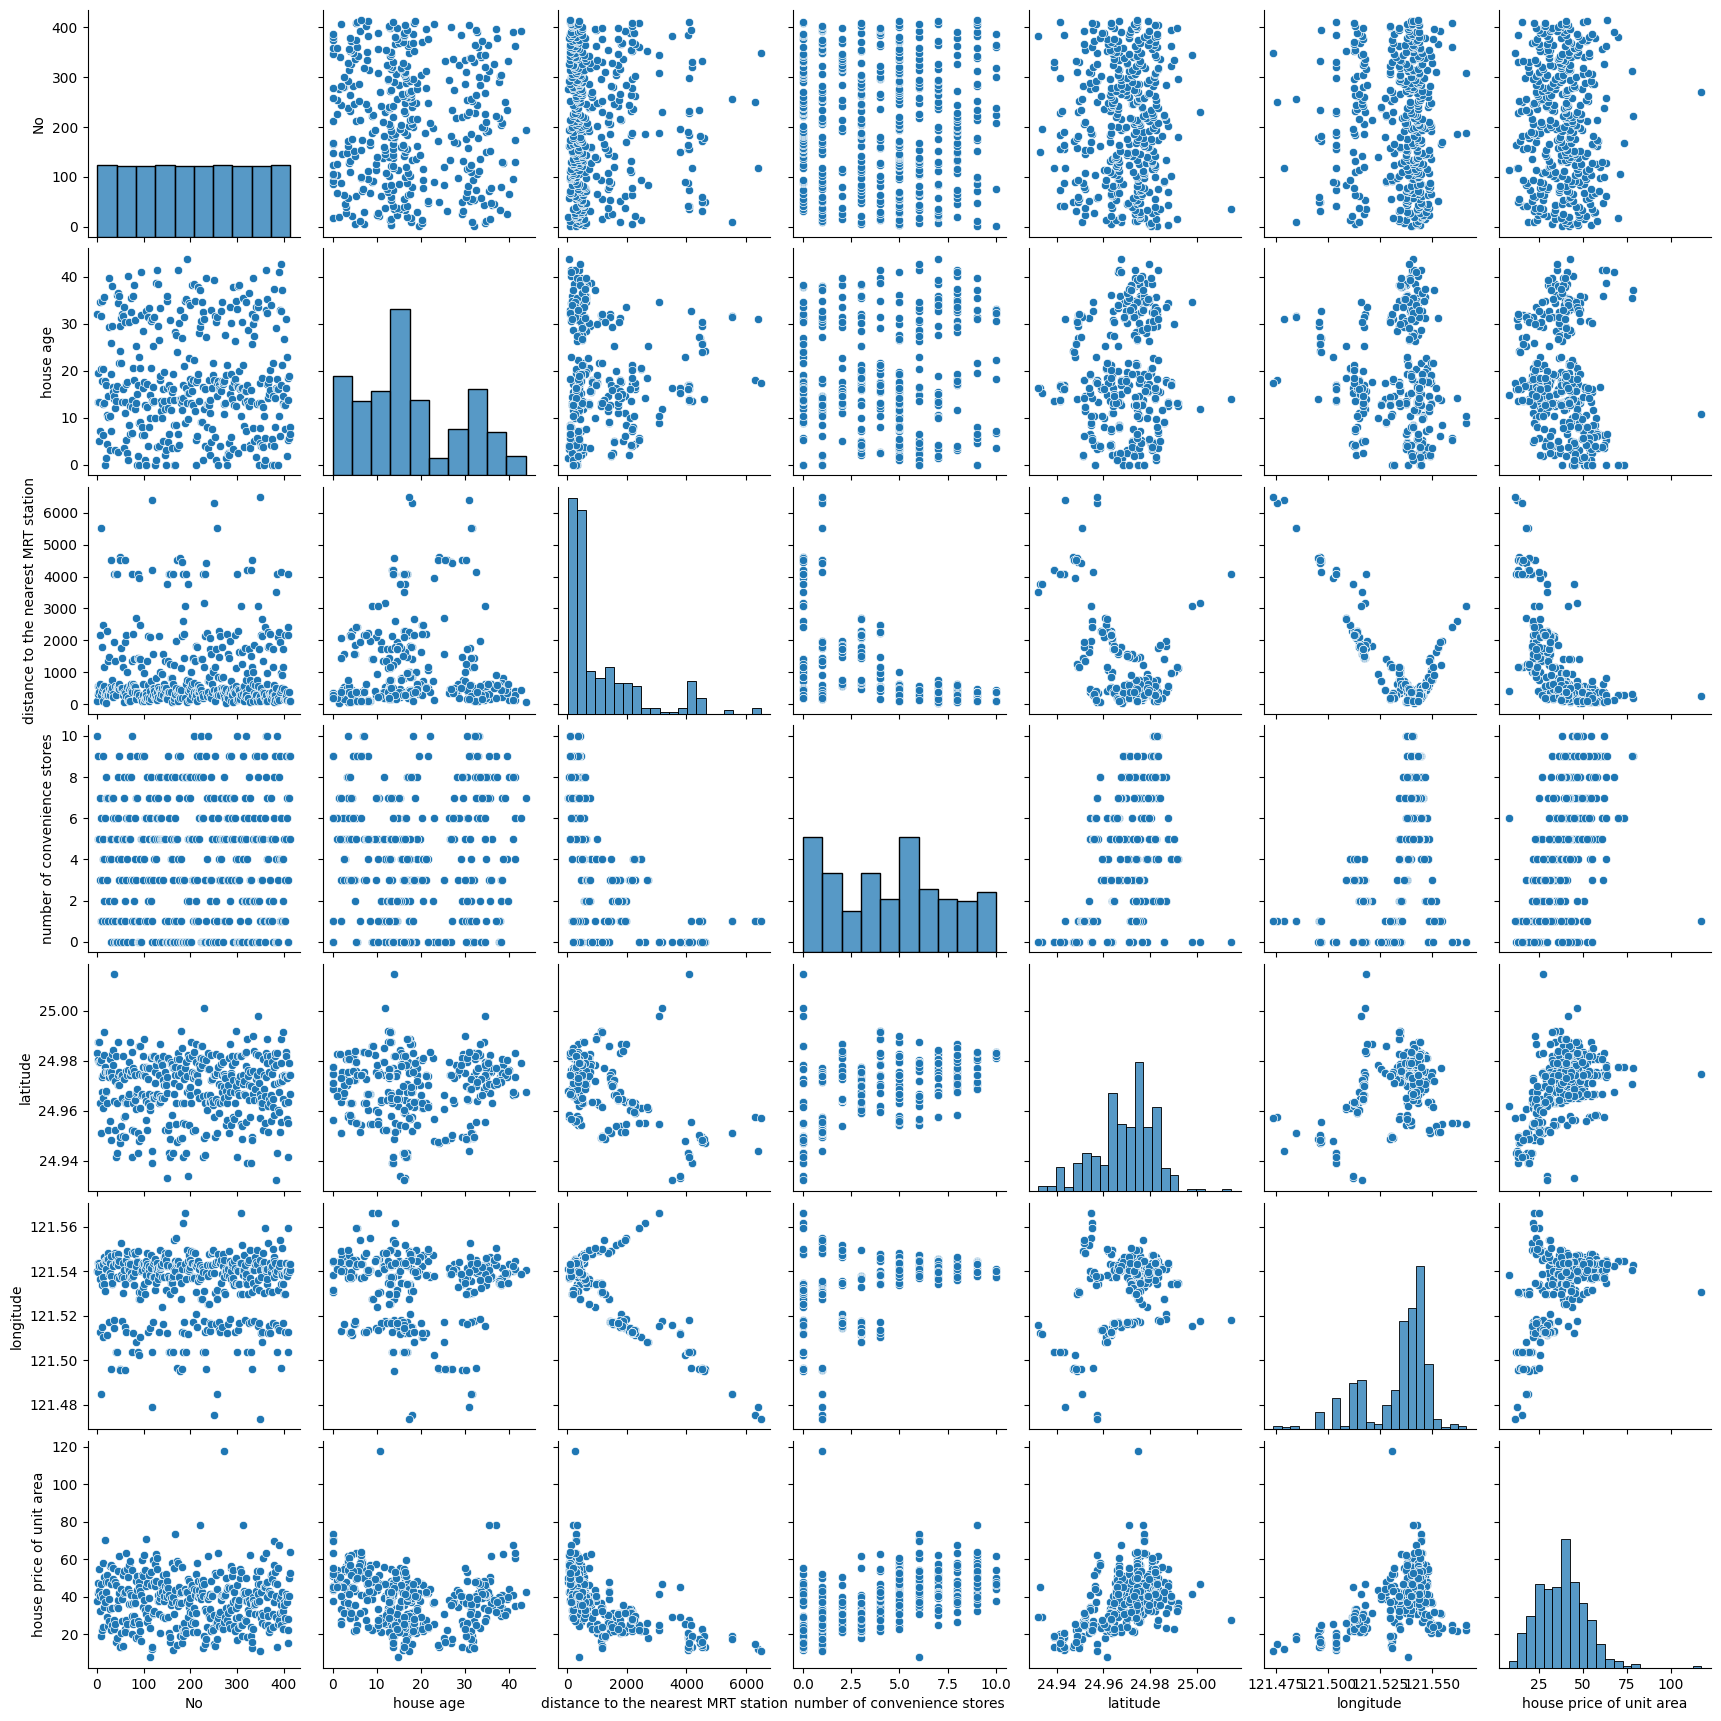

In [9]:
sns.pairplot(df)

In [10]:
X = df.iloc[:,:-1]

In [11]:
y=df.iloc[:,-1]

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
s=StandardScaler()

In [14]:
X=s.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=106)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print(lm.intercept_)

38.0120540155415


In [21]:
lm.coef_

array([-0.20532963, -2.79541139, -6.47850882,  3.14982703,  2.74971267,
       -0.92461791])

In [22]:
predictions = lm.predict(X_test)

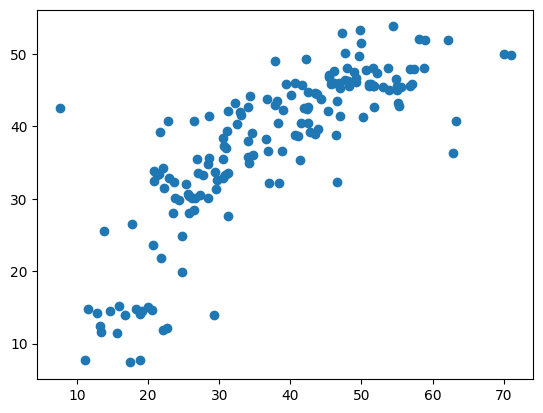

In [23]:
plt.scatter(y_test,predictions)

<ipython-input-24-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


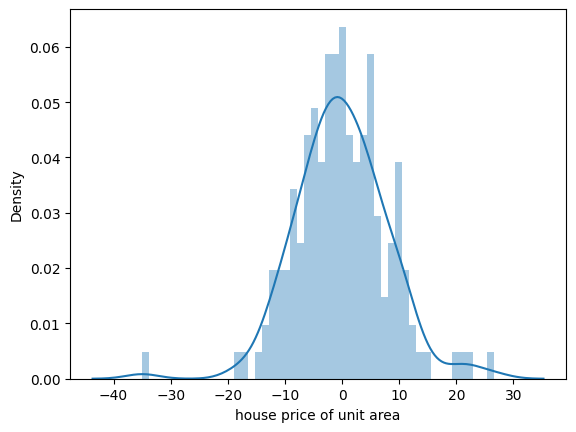

In [24]:
sns.distplot((y_test-predictions),bins=50);

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test,predictions)

0.6533509963191889